# Hierachical Logisitc Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import theano.tensor as tt
import theano
import pymc3 as pm

In [113]:
tornados_clean = pd.read_csv("combined_tornado_weather_clean.csv")
pd.set_option('display.max_columns', None)
tornados.head(25)

,Unnamed: 0,om,yr,mo,dy,date,time,tz,st,stf,stn,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,ns,sn,sg,f1,f2,f3,f4,fc,weather_date,weather_time,wind_speed,visibility_distance,temperature,temperature_dewpoint,air_pressure,weather_date_2,weather_time_2,wind_speed_2,visibility_distance_2,temperature_2,temperature_dewpoint_2,air_pressure_2,time_binned
0,1,617023,2018,12,31,2018-12-31,13:43:00,3,IN,18,0,1.0,0.0,0.0,50000.0,0.0,38.1813,-86.8863,38.2006,-86.8585,2.01,50.0,1,1,1,147,0,0,0,0,20181231,1256,46.0,16093.0,111.0,106.0,10102.0,20181231,1132,67.0,16093.0,100.0,90.0,10088.4,4
1,2,617024,2018,12,31,2018-12-31,14:38:00,3,IN,18,0,1.0,0.0,0.0,20000.0,0.0,38.0935,-86.0869,38.1000,-86.0470,2.20,140.0,1,1,1,61,0,0,0,0,20181231,1326,26.0,0.0,90.0,90.0,10120.0,20181231,1239,31.0,6437.0,80.0,80.0,10124.0,4
2,3,617013,2018,12,20,2018-12-20,07:45:00,3,FL,12,0,0.0,0.0,0.0,5000.0,0.0,27.7532,-81.7702,27.7424,-81.7680,0.76,75.0,1,1,1,105,0,0,0,0,20181220,615,80.0,16093.0,160.0,154.0,10090.8,20181220,515,68.6,16093.0,160.0,147.4,10094.4,2
3,4,617014,2018,12,20,2018-12-20,08:14:00,3,FL,12,0,0.0,1.0,0.0,45000.0,0.0,27.8287,-81.6011,27.8297,-81.6010,0.07,30.0,1,1,1,105,0,0,0,0,20181220,715,54.4,16093.0,160.0,136.4,10101.0,20181220,615,34.8,16093.0,160.0,134.4,10094.6,2
4,5,617015,2018,12,20,2018-12-20,11:28:00,3,FL,12,0,0.0,0.0,0.0,30000.0,0.0,27.0070,-82.1342,27.0209,-82.1286,1.02,100.0,1,1,1,15,0,0,0,0,20181220,1053,51.0,16093.0,194.0,178.0,10085.0,20181220,953,62.0,16093.0,189.0,172.0,10087.0,3
5,6,617011,2018,12,18,2018-12-18,15:50:00,3,WA,53,0,2.0,0.0,0.0,1180000.0,0.0,47.5070,-122.6395,47.5181,-122.6158,1.35,285.0,1,1,1,35,0,0,0,0,20181218,1456,57.0,16093.0,83.0,78.0,10031.0,20181218,1333,57.0,16093.0,80.0,80.0,10089.6,4
6,7,617010,2018,12,9,2018-12-09,10:54:00,3,FL,12,0,0.0,0.0,0.0,40000.0,0.0,28.5429,-81.2304,28.5447,-81.2296,0.13,50.0,1,1,1,95,0,0,0,0,20181209,953,46.0,16093.0,200.0,189.0,10146.0,20181209,815,41.0,16093.0,200.0,183.0,10106.6,3
7,8,617000,2018,12,2,2018-12-02,01:49:00,3,AL,1,0,0.0,0.0,0.0,15000.0,0.0,31.2374,-85.4872,31.2448,-85.4721,1.03,75.0,1,1,1,69,0,0,0,0,20181202,17,41.0,16093.0,194.0,183.0,10138.4,20181201,2323,51.0,8047.0,194.0,183.0,10133.8,1
8,9,617001,2018,12,2,2018-12-02,08:22:00,3,GA,13,0,0.0,0.0,0.0,10000.0,0.0,31.3390,-83.6184,31.3595,-83.5979,1.86,600.0,1,1,1,277,0,0,0,0,20181202,715,41.0,16093.0,238.2,185.4,10093.4,20181202,615,21.0,16093.0,232.0,186.0,10136.0,2
9,10,617003,2018,12,2,2018-12-02,13:30:00,3,GA,13,0,0.0,0.0,0.0,2000.0,0.0,31.3100,-82.8600,31.3114,-82.8573,0.19,50.0,1,1,1,3,0,0,0,0,20181202,1216,26.0,16093.0,220.0,210.0,10036.2,20181202,1116,31.0,8047.0,210.0,210.0,10099.0,4


Create a new column called regions to simplify the number of groups. These regions come from

In [115]:
# create a list of our conditions
conditions = [
    (tornados_clean['st'].isin(['IL', 'IN', 'KY', 'MO', 'OH', 'TN', 'WV'])),
    (tornados_clean['st'].isin(['IA', 'MI', 'MN', 'WI'])),
    (tornados_clean['st'].isin(['CT', 'DE', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT'])),
    (tornados_clean['st'].isin(['ID', 'OR', 'WA'])),
    (tornados_clean['st'].isin(['AR', 'KS', 'LA', 'MS', 'OK', 'TX'])),
    (tornados_clean['st'].isin(['AL', 'FL', 'GA', 'NC', 'SC', 'VA', 'PR','DC'])),
    (tornados_clean['st'].isin(['AZ', 'CO', 'NM', 'UT'])),
    (tornados_clean['st'].isin(['CA', 'NV', 'HI'])),
    (tornados_clean['st'].isin(['MT', 'NE', 'ND', 'SD', 'WY'])),
    ]

# create a list of the values we want to assign for each condition
values = ['Central', 'East North Central', 'Northeast', 'Northwest', 'South', 'Southeast', 'Southwest', 'West', 'West North Central']

# create a new column and use np.select to assign values to it using our lists as arguments
tornados_clean['region'] = np.select(conditions, values)
tornados_clean['region'].value_counts()

South                 1414
Southeast             1109
Central                963
East North Central     687
West North Central     312
Northeast              238
Southwest              151
West                    51
Northwest               30
Name: region, dtype: int64

Generate a test and train set. Standarize all numeric predictors.

In [120]:
tornados_clean[numeric_predictors] = tornados_clean[numeric_predictors].astype(float)
# Numeric predictors
numeric_predictors = ['inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len', 'wid', 'wind_speed','visibility_distance','temperature','temperature_dewpoint','air_pressure','wind_speed_2','visibility_distance_2','temperature_2','temperature_dewpoint_2','air_pressure_2']
n = tornados_clean.shape[0]
# Numeric, categorical predictors and response, y`
x_num = tornados_clean[numeric_predictors]
x_cat = tornados_clean[['st','region','time_binned']]
y = tornados_clean['mag']
all_predictors = numeric_predictors
# No. of predictors
k = len(all_predictors)
# Standardize numeric columns, to mean 0 variance 1
mean = x_num.mean()
std = x_num.std()
x_num = np.array((x_num - mean) / std)
# Put them into one data matrix
X = pd.DataFrame(np.concatenate((x_num, x_cat), axis = 1), columns = numeric_predictors + ['st', 'region', 'time_binned'])
X[numeric_predictors] = X[numeric_predictors].astype(float)
display(X.describe())


,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,wind_speed,visibility_distance,temperature,temperature_dewpoint,air_pressure,wind_speed_2,visibility_distance_2,temperature_2,temperature_dewpoint_2,air_pressure_2
count,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03,4.955000e+03
mean,-2.249311e-15,6.652488e-16,-1.091192e-15,-1.023249e-15,-1.388619e-14,-3.214071e-14,8.246974e-15,5.186232e-16,-1.935620e-15,1.058913e-16,-7.224628e-16,-5.049442e-16,-1.743196e-16,-2.815194e-15,2.868214e-13,-1.413535e-15,3.846861e-15,-9.222357e-16,-1.564843e-15,7.389006e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.317011e-02,-4.430249e-02,-4.258022e-02,-2.408248e-02,-3.740291e+00,-7.863424e+00,-3.746887e+00,-7.861067e+00,-5.749167e-01,-6.602515e-01,-1.820898e+00,-3.425157e+00,-4.324916e+00,-6.605050e+00,-6.479175e+00,-1.766459e+00,-3.296568e+00,-3.787919e+00,-6.272212e+00,-6.909185e+00
25%,-6.317011e-02,-4.430249e-02,-4.258022e-02,-2.408248e-02,-7.814103e-01,-6.249652e-01,-7.814471e-01,-6.274335e-01,-5.081225e-01,-4.623451e-01,-6.847673e-01,-2.688190e-01,-6.269870e-01,-5.071305e-01,-6.305490e-01,-8.014137e-01,-2.275483e-01,-5.820205e-01,-5.691494e-01,-5.797124e-01
50%,-6.317011e-02,-4.430249e-02,-4.258022e-02,-2.408248e-02,-3.551835e-02,3.295985e-02,-3.649734e-02,3.499585e-02,-3.289186e-01,-3.613725e-01,-1.350265e-01,5.200816e-01,1.011027e-01,1.780290e-01,4.159159e-02,-5.907128e-02,5.397067e-01,2.862679e-02,1.912589e-01,4.522288e-02
75%,-6.317011e-02,-4.430249e-02,-4.258009e-02,-2.408248e-02,7.702174e-01,6.471189e-01,7.690598e-01,6.491629e-01,9.139615e-02,1.434908e-01,6.346105e-01,5.200816e-01,6.759104e-01,6.348020e-01,6.083967e-01,6.795594e-01,5.397067e-01,6.774396e-01,6.832878e-01,5.900383e-01
max,5.710949e+01,6.478556e+01,5.230487e+01,6.862553e+01,2.388728e+00,2.873164e+00,2.388919e+00,2.865499e+00,1.527975e+01,1.234503e+01,5.142485e+00,1.630152e+01,3.971474e+00,2.461894e+00,5.233125e+00,4.729037e+00,1.588528e+01,3.654345e+00,2.472484e+00,5.322454e+00


Show correlations of all variables to later remove correlated predictors

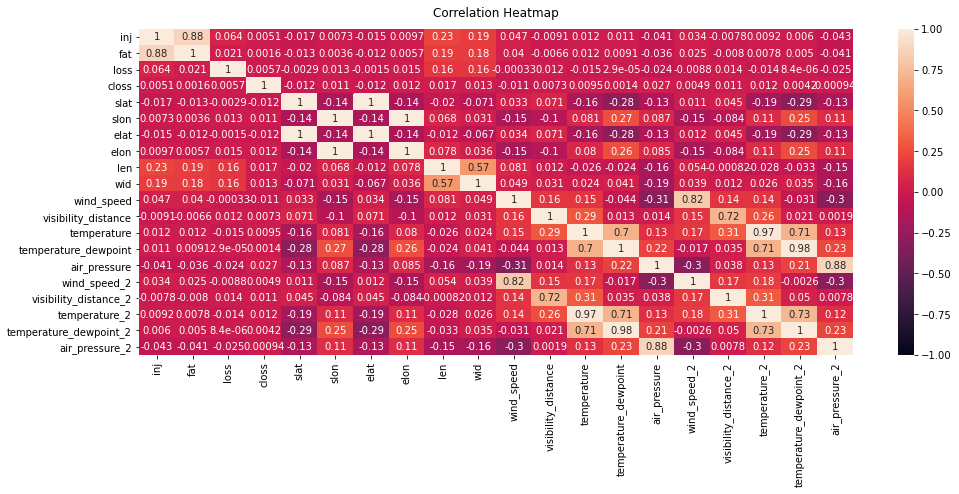

In [84]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(X[numeric_predictors].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlations');

Display all the pairs of columns that have a correlation greater than 0.75

In [117]:
c = X[numeric_predictors].corr().abs()

s = c.unstack()
# Ignore postive correlations of 1
s = s[(s != 1) & (abs(s > 0.75))]
so = s.sort_values(ascending=False)
display(so)

elat                    slat                      0.999942
slat                    elat                      0.999942
elon                    slon                      0.999940
slon                    elon                      0.999940
temperature_dewpoint_2  temperature_dewpoint      0.979438
temperature_dewpoint    temperature_dewpoint_2    0.979438
temperature_2           temperature               0.974365
temperature             temperature_2             0.974365
fat                     inj                       0.875551
inj                     fat                       0.875551
air_pressure_2          air_pressure              0.875207
air_pressure            air_pressure_2            0.875207
wind_speed_2            wind_speed                0.822527
wind_speed              wind_speed_2              0.822527
dtype: float64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

Functions for grouping data into states and regions

In [38]:
def create_state_idxs(data):
    # Create our group of states
    states = data.st.unique()
    states_lookup = dict(zip(states, range(len(states))))

    n_states = len(states)
    state = data.st.replace(states_lookup).values
    
    return state

In [12]:
def create_region_idxs(data):
    # Create our group of states
    regions = data.region.unique()
    regions_lookup = dict(zip(regions, range(len(regions))))

    region = data.region.replace(regions_lookup).values
    
    return region

Followed this tutorial: https://docs.pymc.io/notebooks/variational_api_quickstart.html?highlight=softmax#Multilabel-logistic-regression

## Model 1: All predictors, grouped by state

In [ ]:
import theano.tensor as tt
import theano
import pymc3 as pm

n_classes = 6
num_predictors = 21
theano.config.optimizer='fast_compile'  

n_states = len(X.st.unique())

X_train_clean = X_train.drop(['st', 'region'], axis=1)

with pm.Model() as tornado_model:

    # Priors
    mu_intercept = pm.Normal('mu_intercept', mu=0, sd=1)

    sigma_intercept = pm.HalfNormal('sigma_intercept', sd=1)

    mu_beta = pm.Normal('mu_beta', mu=0, sd=1)

    sigma_beta = pm.HalfNormal('sigma_beta', sd=1)
    
    # Create shared variables to be replaced with test data
    Xt = pm.Data("input", X_train_clean)
    yt = pm.Data("output", y_train)
    state = pm.Data("state", np.asarray(create_state_idxs(X_train)))

    # Define our parameters
    beta = pm.Normal('beta', mu=mu_beta, sigma=sigma_beta, shape=(n_states, n_classes-1, num_predictors))
    Intercept = pm.Normal('Intercept', mu=mu_intercept, sigma=sigma_intercept, shape=(n_states, n_classes-1))
    
    
    # Use softmax to get probabilities
    est = Intercept[state] + pm.math.sum(beta[state, :, :] * Xt.reshape((Xt.shape[0], 1, Xt.shape[1])), axis=2)
    est = tt.concatenate(tensor_list=[est, 
                                              tt.zeros((Xt.shape[0], 1))],
                                 axis=1)
    
    p = pm.Deterministic('p', tt.nnet.softmax(est))

    likelihood = pm.Categorical(name='y', p=p, observed=yt)
    

Finished [100%]: Average Loss = 5,532.9


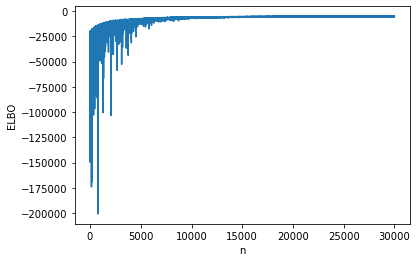

In [101]:
import seaborn as sns
with tornado_model:
    hierarchical_approx = pm.fit(30000, method = 'advi')

advi_elbo = pd.DataFrame(
    {'ELBO': -hierarchical_approx.hist,
     'n': np.arange(hierarchical_approx.hist.shape[0])})

_ = sns.lineplot(y='ELBO', x='n', data=advi_elbo)

Predict using variational inference. Best accuracy is 50%.

In [102]:
# Predict from variational
theano.config.exception_verbosity='high'
state = create_state_idxs(X_test)
X_test_clean = X_test.drop(['st','region'], axis=1)
with tornado_model:
    pm.set_data({'input': X_test_clean, "output": y_test, 'state': state})
    model_1_preds = pm.sample_posterior_predictive(hierarchical_approx.sample(50000), var_names=["p"], model=tornado_model, samples=50000)

Sample the posterior distribution using the NUTS sampler and 4 chains.

In [103]:
#Accuracy by making a hard classification on the class with the highest mean probability from sampling the posterior 
correct = np.sum(model_1_preds['p'].mean(0).argmax(-1) == y_test)
accuracy = correct / len(y_test)
print(accuracy)

0.5


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, beta, sigma_beta, mu_beta, sigma_intercept, mu_intercept]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 1623 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/traceplot.py:195: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (4312), generating only 20 plots
  UserWarning,


array([[<AxesSubplot:title={'center':'Intercept\n0, 0'}>,
        <AxesSubplot:title={'center':'Intercept\n0, 0'}>],
       [<AxesSubplot:title={'center':'Intercept\n0, 1'}>,
        <AxesSubplot:title={'center':'Intercept\n0, 1'}>],
       [<AxesSubplot:title={'center':'Intercept\n0, 2'}>,
        <AxesSubplot:title={'center':'Intercept\n0, 2'}>],
       [<AxesSubplot:title={'center':'Intercept\n0, 3'}>,
        <AxesSubplot:title={'center':'Intercept\n0, 3'}>],
       [<AxesSubplot:title={'center':'Intercept\n1, 0'}>,
        <AxesSubplot:title={'center':'Intercept\n1, 0'}>],
       [<AxesSubplot:title={'center':'Intercept\n1, 1'}>,
        <AxesSubplot:title={'center':'Intercept\n1, 1'}>],
       [<AxesSubplot:title={'center':'Intercept\n1, 2'}>,
        <AxesSubplot:title={'center':'Intercept\n1, 2'}>],
       [<AxesSubplot:title={'center':'Intercept\n1, 3'}>,
        <AxesSubplot:title={'center':'Intercept\n1, 3'}>],
       [<AxesSubplot:title={'center':'Intercept\n2, 0'}>,
      

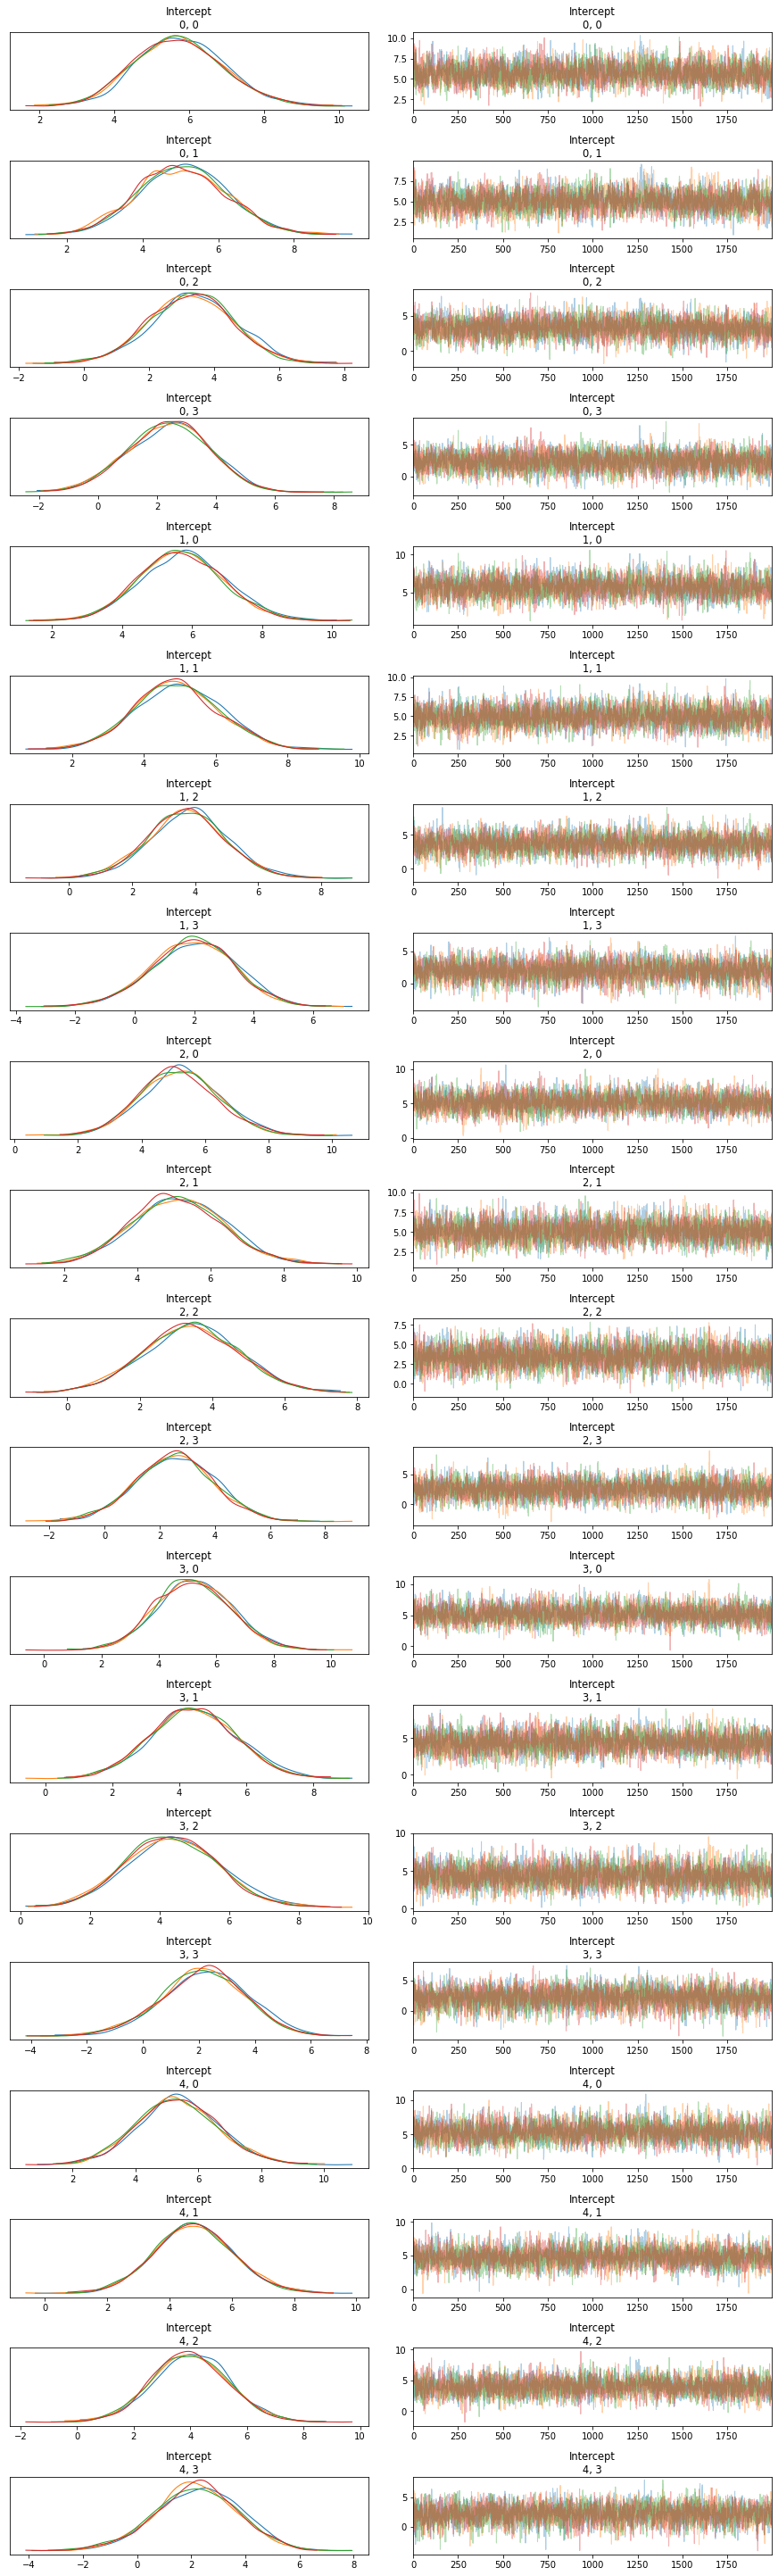

In [170]:
import arviz as az
with tornado_model:
    hierarchical_trace = pm.sample(2000, step = pm.NUTS(target_accept = 0.95), cores = 4, tune=2000)
hierarchical_idata = az.from_pymc3(hierarchical_trace)
az.plot_trace(hierarchical_trace, var_names=["Intercept","beta"])

https://docs.pymc.io/notebooks/posterior_predictive.html

Predict using sampling. Best accuracy is 56%

In [171]:
# Predict from trace
state = create_state_idxs(X_test)
with tornado_model:
    pm.set_data({'input': X_test_clean, "output": y_test, 'state': state})
    model_preds_trace = pm.sample_posterior_predictive(hierarchical_trace, var_names=["p"], model=tornado_model, samples=50000)

#Accuracy
correct = np.sum(model_preds_trace['p'].mean(0).argmax(-1) == y_test)
accuracy = correct / len(y_test)
print(accuracy)

0.5612244897959183


## Model 2: All predictors, grouped by region

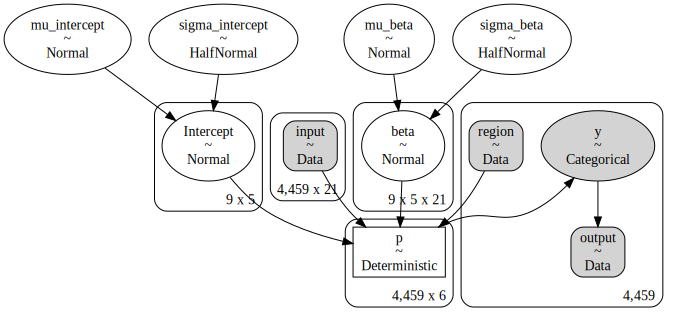

In [131]:
n_classes = 6
num_predictors = 21 

n_regions = len(X.region.unique())

X_train_clean = X_train.drop(['st', 'region'], axis=1)

with pm.Model() as tornado_regions_model:

    # Priors
    mu_intercept = pm.Normal('mu_intercept', mu=0, sd=1)

    sigma_intercept = pm.HalfNormal('sigma_intercept', sd=1)

    mu_beta = pm.Normal('mu_beta', mu=0, sd=100)

    sigma_beta = pm.HalfNormal('sigma_beta', sd=100)
    
    # Create shared variables to be replaced with test data
    Xt = pm.Data("input", X_train_clean)
    yt = pm.Data("output", y_train)
    region = pm.Data("region", np.asarray(create_region_idxs(X_train)))

    # Define our parameters
    beta = pm.Normal('beta', mu=mu_beta, sigma=sigma_beta, shape=(n_regions, n_classes-1, num_predictors))
    Intercept = pm.Normal('Intercept', mu=mu_intercept, sigma=sigma_intercept, shape=(n_regions, n_classes-1))
    
    
    # Use softmax to get probabilities
    est = Intercept[region] + pm.math.sum(beta[region, :, :] * Xt.reshape((Xt.shape[0], 1, Xt.shape[1])), axis=2)
    est = tt.concatenate(tensor_list=[est, 
                                              tt.zeros((Xt.shape[0], 1))],
                                 axis=1)
    
    p = pm.Deterministic('p', tt.nnet.softmax(est))

    likelihood = pm.Categorical(name='y', p=p, observed=yt)

pm.model_to_graphviz(tornado_regions_model)

Approximate the posterior with variational inference and make predictions.

Finished [100%]: Average Loss = 4,169


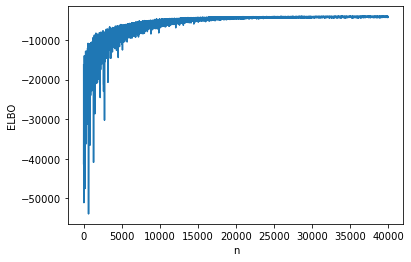

In [107]:
import seaborn as sns
with tornado_regions_model:
    hierarchical_approx_2 = pm.fit(40000, method = 'advi')

advi_elbo = pd.DataFrame(
    {'ELBO': -hierarchical_approx_2.hist,
     'n': np.arange(hierarchical_approx_2.hist.shape[0])})

_ = sns.lineplot(y='ELBO', x='n', data=advi_elbo)

The above plot of the ELBO shows nice convergence. The accuracy is 53%

In [108]:
# Predict from variational
region = create_region_idxs(X_test)
X_test_clean = X_test.drop(['st','region'], axis=1)
with tornado_regions_model:
    pm.set_data({'input': X_test_clean, "output": y_test, 'region': region})
    model_2_preds = pm.sample_posterior_predictive(hierarchical_approx_2.sample(50000), var_names=["p"], samples=50000)
    
#Accuracy
correct = np.sum(model_2_preds['p'].mean(0).argmax(-1) == y_test)
accuracy = correct / len(y_test)
print(accuracy)

0.530241935483871


Predict from sampling. The best accuracy is 57% with all predictors.

In [132]:
with tornado_regions_model:
    #db = pm.backends.Text('tornado_regions_model')
    hierarchical_trace_2 = pm.sample(500, step = pm.NUTS(target_accept = 0.95), cores = 4, tune=1000)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, beta, sigma_beta, mu_beta, sigma_intercept, mu_intercept]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 4197 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


In [133]:
# Predict from trace
region = create_region_idxs(X_test)
X_test_clean = X_test.drop(['st','region'], axis=1)
with tornado_regions_model:
    pm.set_data({'input': X_test_clean, "output": y_test, 'region': region})
    model_preds_trace_2 = pm.sample_posterior_predictive(hierarchical_trace_2, var_names=["p"], model=tornado_regions_model, samples=50000)

#Accuracy
correct = np.sum(model_preds_trace_2['p'].mean(0).argmax(-1) == y_test)
accuracy = correct / len(y_test)
print(accuracy)

0.5665322580645161


In [213]:
#hierarchical_idata = az.from_pymc3(hierarchical_trace)
summary_df = pm.summary(hierarchical_trace_2, var_names=["beta"])
summary_df[~((summary_df['hdi_3%'] < 0) & (summary_df['hdi_97%'] > 0))]

/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
"beta[0,0,8]",-1.013,0.324,-1.592,-0.364,0.007,0.005,2033.0,2014.0,2035.0,1719.0,1.00
"beta[0,0,9]",-1.876,0.365,-2.559,-1.221,0.008,0.006,1943.0,1943.0,1936.0,1666.0,1.00
"beta[0,3,9]",0.995,0.370,0.348,1.758,0.008,0.006,2006.0,1720.0,2031.0,1641.0,1.00
"beta[1,0,8]",-1.599,0.401,-2.345,-0.835,0.009,0.006,2176.0,1972.0,2180.0,1709.0,1.00
"beta[1,0,9]",-1.738,0.375,-2.438,-1.034,0.008,0.006,2129.0,2038.0,2119.0,1440.0,1.00
"beta[1,4,9]",0.702,0.361,0.066,1.408,0.008,0.006,2023.0,1630.0,2067.0,1718.0,1.00
"beta[2,0,8]",-1.848,0.315,-2.393,-1.226,0.008,0.006,1580.0,1580.0,1578.0,1691.0,1.00
"beta[2,0,9]",-2.697,0.370,-3.387,-2.017,0.009,0.006,1689.0,1670.0,1701.0,1495.0,1.00
"beta[2,1,0]",-1.178,0.486,-2.046,-0.259,0.008,0.007,3317.0,2360.0,3396.0,1498.0,1.00
"beta[2,3,8]",0.635,0.278,0.111,1.137,0.008,0.006,1325.0,1240.0,1333.0,1458.0,1.00


Because the weather observations are highly correlated with the prevous ones, create a delta column that represents the change between the two. Also removed other correlated columns like elon, elat, and fat (corr with inj)

In [175]:
tornados_clean_2 = tornados_clean.copy()
tornados_clean_2['delta_wind_speed'] = tornados_clean_2['wind_speed'] - tornados_clean_2['wind_speed_2']
tornados_clean_2['delta_visibility_distance'] = tornados_clean_2['visibility_distance'] - tornados_clean_2['visibility_distance_2']
tornados_clean_2['delta_temperature'] = tornados_clean_2['temperature'] - tornados_clean_2['temperature_2']
tornados_clean_2['delta_temperature_dewpoint'] = tornados_clean_2['temperature_dewpoint'] - tornados_clean_2['temperature_dewpoint_2']
tornados_clean_2['delta_air_pressure'] = tornados_clean_2['air_pressure'] - tornados_clean_2['air_pressure_2']
# Numeric predictors
small_predictors = ['inj', 'loss', 'closs', 'slat', 'slon', 'len', 'wid', 'delta_wind_speed','delta_visibility_distance','delta_temperature','delta_temperature_dewpoint','delta_air_pressure']

display(tornados_clean_2[small_predictors].describe())

,inj,loss,closs,slat,slon,len,wid,delta_wind_speed,delta_visibility_distance,delta_temperature,delta_temperature_dewpoint,delta_air_pressure
count,4955.000000,4.955000e+03,4.955000e+03,4955.000000,4955.000000,4955.000000,4955.000000,4955.000000,4955.000000,4955.000000,4955.000000,4955.000000
mean,1.270636,2.524028e+05,2.631022e+03,37.038310,-90.655885,3.538987,164.472856,2.092795,142.583169,6.223451,2.756650,-6.365045
std,20.114509,5.927700e+06,1.092504e+05,5.000523,8.570581,6.138257,247.591792,16.156923,3108.627408,11.843436,9.020643,19.455782
min,0.000000,0.000000e+00,0.000000e+00,18.334900,-158.050000,0.010000,1.000000,-88.000000,-15691.000000,-70.000000,-100.000000,-181.400000
25%,0.000000,0.000000e+00,0.000000e+00,33.130850,-96.012200,0.420000,50.000000,-6.000000,0.000000,0.000000,0.000000,-11.800000
50%,0.000000,1.000000e-02,0.000000e+00,36.860700,-90.373400,1.520000,75.000000,0.000000,0.000000,5.000000,0.000000,-5.200000
75%,0.000000,7.500000e-01,0.000000e+00,40.889800,-85.109700,4.100000,200.000000,11.000000,0.000000,11.000000,8.000000,0.800000
max,1150.000000,3.103000e+08,7.500000e+06,48.983200,-66.031200,97.330000,3221.000000,103.000000,15892.000000,67.000000,62.400000,162.200000


Recreate the train and test set with the new set of predictors

In [177]:
n = tornados_clean_2.shape[0]
# Numeric, categorical predictors and response, y`
x_num = tornados_clean_2[small_predictors]
x_cat = tornados_clean_2[['st','region', 'time_binned']]
y = tornados_clean_2['mag']
#y = tornados_clean_2['mag'] >= 2 else 0
all_predictors = numeric_predictors
# No. of predictors
k = len(all_predictors)
# Standardize numeric columns, to mean 0 variance 1
mean = x_num.mean()
std = x_num.std()
x_num = np.array((x_num - mean) / std)
# Put them into one data matrix
X = pd.DataFrame(np.concatenate((x_num, x_cat), axis = 1), columns = small_predictors + ['st', 'region', 'time_binned'])
X[small_predictors] = X[small_predictors].astype(float)
display(X.dtypes)
display(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

inj                           float64
loss                          float64
closs                         float64
slat                          float64
slon                          float64
len                           float64
wid                           float64
delta_wind_speed              float64
delta_visibility_distance     float64
delta_temperature             float64
delta_temperature_dewpoint    float64
delta_air_pressure            float64
st                             object
region                         object
time_binned                    object
dtype: object

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
4950    0.0
4951    1.0
4952    2.0
4953    0.0
4954    2.0
Name: mag, Length: 4955, dtype: float64

## Model 4: len, wid + weather, grouped by region

,len,wid,delta_wind_speed,delta_visibility_distance,delta_temperature,delta_temperature_dewpoint,delta_air_pressure
count,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000
mean,0.003973,0.000827,-0.001876,0.001268,-0.005835,-0.001305,0.002111
std,1.014140,1.006573,1.008780,0.999720,1.007127,0.994667,1.007092
min,-0.574917,-0.660252,-5.576111,-5.093432,-6.435924,-11.391278,-8.996552
25%,-0.511381,-0.462345,-0.500887,-0.045867,-0.525477,-0.305594,-0.274209
50%,-0.332177,-0.361372,-0.129529,-0.045867,-0.103302,-0.305594,0.059882
75%,0.091396,0.143491,0.551293,-0.045867,0.403308,0.581261,0.378553
max,15.279746,12.345026,6.245447,5.066357,5.131665,5.237249,8.664008


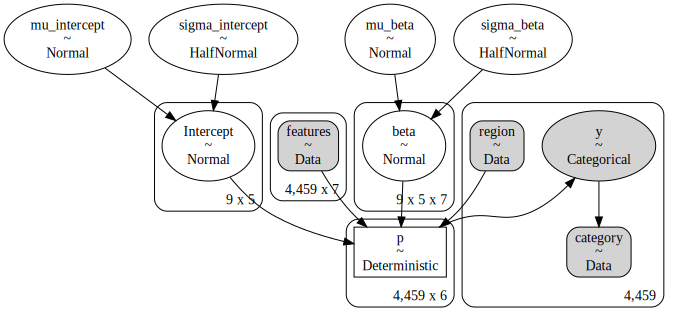

In [209]:
n_classes = 6
num_predictors = 7
theano.config.optimizer='fast_compile'  

n_regions = len(X.region.unique())

cols_to_drop_4 = ['st', 'region', 'inj', 'loss', 'closs', 'slat', 'slon', 'time_binned']
X_train_clean = X_train.drop(cols_to_drop_4, axis=1)
display(X_train_clean.describe())

with pm.Model() as tornado_regions_small_model_4:

    # Priors
    mu_intercept = pm.Normal('mu_intercept', mu=0, sd=1)

    sigma_intercept = pm.HalfNormal('sigma_intercept', sd=1)

    mu_beta = pm.Normal('mu_beta', mu=0, sd=100)

    sigma_beta = pm.HalfNormal('sigma_beta', sd=100)

    
    # Create shared variables to be replaced with test data
    Xt = pm.Data("features", X_train_clean)
    yt = pm.Data("category", y_train)
    region = pm.Data("region", np.asarray(create_region_idxs(X_train)))

    # Define our parameters
    beta = pm.Normal('beta', mu=mu_beta, sigma=sigma_beta, shape=(n_regions, n_classes-1, num_predictors))
    Intercept = pm.Normal('Intercept', mu=mu_intercept,sigma=sigma_intercept,shape=(n_regions, n_classes-1))
    
    
    # Use softmax to get probabilities
    est = Intercept[region] + pm.math.sum(beta[region, :, :] * Xt.reshape((Xt.shape[0], 1, Xt.shape[1])), axis=2)
    est = tt.concatenate(tensor_list=[est, 
                                              tt.zeros((Xt.shape[0], 1))],
                                 axis=1)
    
    p = pm.Deterministic('p', tt.nnet.softmax(est))

    likelihood = pm.Categorical(name='y', p=p, observed=yt)

pm.model_to_graphviz(tornado_regions_small_model_4)


Use varitional inference to approximate the posterior and predict on the test set. The elbo plot shows convergence. The accuracy is 63.3%.

Finished [100%]: Average Loss = 3,889


0.6330645161290323

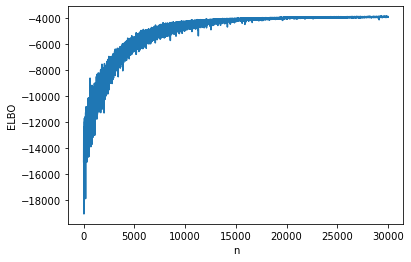

In [99]:
import seaborn as sns
with tornado_regions_small_model_4:
    hierarchical_approx_4 = pm.fit(30000, method = 'advi')

advi_elbo = pd.DataFrame(
    {'ELBO': -hierarchical_approx_4.hist,
     'n': np.arange(hierarchical_approx_4.hist.shape[0])})

_ = sns.lineplot(y='ELBO', x='n', data=advi_elbo)

# Predict from variational
region = create_region_idxs(X_test)
X_test_clean = X_test.drop(cols_to_drop_4, axis=1)
with tornado_regions_small_model_4:
    pm.set_data({'features': X_test_clean, "category": y_test, 'region': region})
    model_preds = pm.sample_posterior_predictive(hierarchical_approx_4.sample(50000), var_names=["p"], samples=50000)
    
#Accuracy
correct = np.sum(model_preds['p'].mean(0).argmax(-1) == y_test)
accuracy = correct / len(y_test)
display(accuracy)

Using sampling, the accuracy only increased slightly to 63.5%.

In [17]:
with tornado_regions_small_model_4:
    db = pm.backends.Text('tornado_regions_small_model_4')
    hierarchical_trace_4 = pm.sample(500, step = pm.NUTS(target_accept = 0.95), cores = 4, tune=1000, trace=db)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, beta, sigma_beta, mu_beta, sigma_intercept, mu_intercept]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 994 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


In [180]:
# Predict from trace
region = create_region_idxs(X_test)
X_test_clean = X_test.drop(cols_to_drop_4, axis=1)
with tornado_regions_small_model_4:
    pm.set_data({'features': X_test_clean, "category": y_test, 'region': region})
    model_preds_trace_4 = pm.sample_posterior_predictive(hierarchical_trace_4, var_names=["p"], samples=50000)

#Accuracy
correct = np.sum(model_preds_trace_4['p'].mean(0).argmax(-1) == y_test)
accuracy = correct / len(y_test)
print(accuracy)

0.6350806451612904


/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/traceplot.py:195: UserWarning: rcParams['plot.max_subplots'] (25) is smaller than the number of variables to plot (315), generating only 25 plots
  UserWarning,


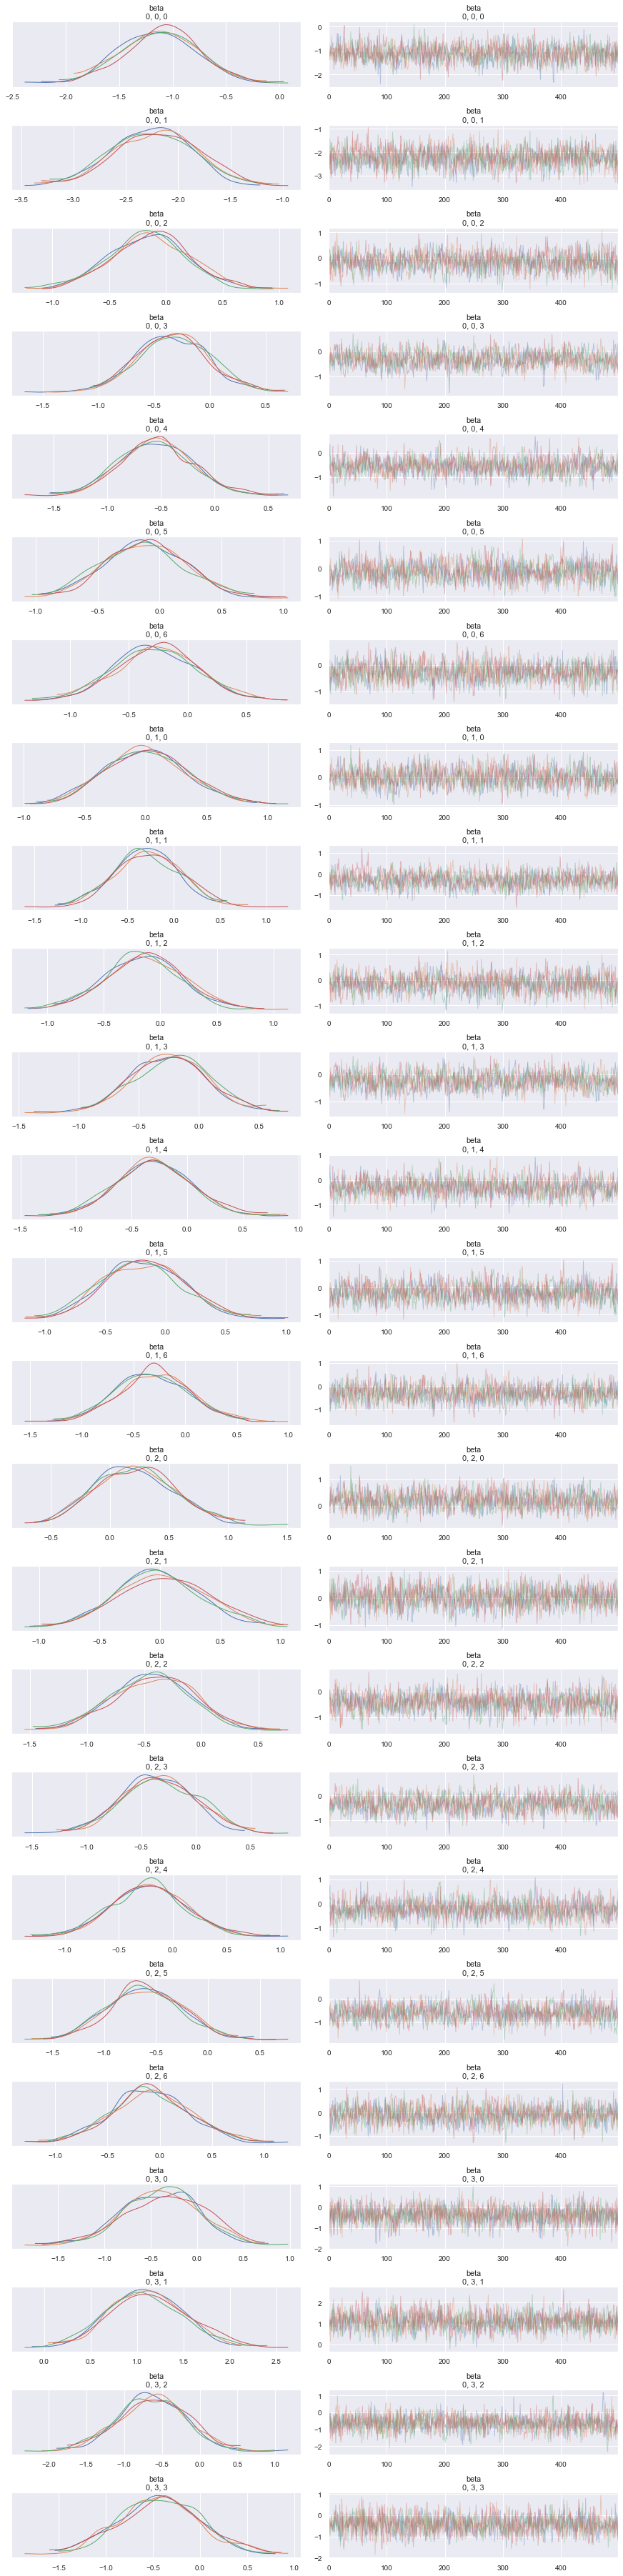

In [262]:
import arviz as az
with az.rc_context({"plot.max_subplots": 50}):
    az.plot_trace(hierarchical_trace_4, var_names=["beta"])

In [235]:
summary_df = pm.summary(hierarchical_trace_4, var_names=["beta"])
small_summary = summary_df[~((summary_df['hdi_3%'] < 0) & (summary_df['hdi_97%'] > 0))].sample(5)
display(small_summary)

/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
beta[4,3,2] -0.872  0.365  -1.557   -0.212      0.013    0.009     819.0   
beta[2,1,1] -1.124  0.324  -1.738   -0.538      0.011    0.008     899.0   
beta[8,2,6] -1.153  0.547  -2.181   -0.129      0.012    0.009    2121.0   
beta[1,2,2] -0.723  0.374  -1.487   -0.062      0.010    0.007    1375.0   
beta[2,0,0] -2.246  0.344  -2.874   -1.600      0.010    0.007    1086.0   

             ess_sd  ess_bulk  ess_tail  r_hat  
beta[4,3,2]   781.0     823.0    1365.0   1.01  
beta[2,1,1]   899.0     898.0    1352.0   1.01  
beta[8,2,6]  1751.0    2157.0    1520.0   1.00  
beta[1,2,2]  1375.0    1360.0    1584.0   1.00  
beta[2,0,0]  1086.0    1086.0    1278.0   1.00  


In [261]:
display(small_summary.index)
display(small_summary.rename(index={'beta[4,3,2]':'R4, C3, delta_wind_speed',  'beta[2,1,1]': 'R2, C1, wid', 'beta[8,2,6]': 'R8, C2, delta_air_pressure', 'beta[1,2,2]': 'R1, C2, delta_wind_speed','beta[2,0,0]': 'R2, C0, len'}))

Index(['beta[4,3,2]', 'beta[2,1,1]', 'beta[8,2,6]', 'beta[1,2,2]',
       'beta[2,0,0]'],
      dtype='object')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
"R4, C3, delta_wind_speed",-0.872,0.365,-1.557,-0.212,0.013,0.009,819.0,781.0,823.0,1365.0,1.01
"R2, C1, wid",-1.124,0.324,-1.738,-0.538,0.011,0.008,899.0,899.0,898.0,1352.0,1.01
"R8, C2, delta_air_pressure",-1.153,0.547,-2.181,-0.129,0.012,0.009,2121.0,1751.0,2157.0,1520.0,1.00
"R1, C2, delta_wind_speed",-0.723,0.374,-1.487,-0.062,0.010,0.007,1375.0,1375.0,1360.0,1584.0,1.00
"R2, C0, len",-2.246,0.344,-2.874,-1.600,0.010,0.007,1086.0,1086.0,1086.0,1278.0,1.00


## Model Averaging

In [134]:
traces = [hierarchical_trace_3, hierarchical_trace_4]
models = [tornado_regions_model, tornado_regions_small_model_4]
comp = pm.compare({"Full model": hierarchical_trace_2, "Small model": hierarchical_trace_4},  ic='WAIC')
comp

/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:150: UserWarning: 
The scale is now log by default. Use 'scale' argument or 'stats.ic_scale' rcParam if you rely on a specific value.
A higher log-score (or a lower deviance) indicates a model with better predictive accuracy.
  "\nThe scale is now log by default. Use 'scale' argument or "
/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:1427: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "Fo

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
Small model,0,-489.962,62.8839,0,1,51.5962,0,True,log
Full model,1,-868.083,379.742,378.121,4.60839e-122,26.4885,41.3509,True,log


The small model will dominate the full model because it's WAIC is much better.

In [135]:
weighted_model_preds = pm.sample_posterior_predictive_w(traces=traces, models=models, weights=comp.sort_values("weight", ascending=True)["weight"])

We can calulate the accuracy only on the training set using the majority class from sampling

In [147]:
#Accuracy
from scipy.stats import mode
print(mode(weighted_model_preds['y'])[0])
print(weighted_model_preds['y'].shape)
correct = np.sum(mode(weighted_model_preds['y'])[0][0] == y_train)
accuracy = correct / len(y_train)
display(accuracy)

[[1 0 0 ... 0 2 0]]
(2000, 4459)


0.6777304328324737

Plot the standard deviation of the probabilities from our trace for each class, representing the uncertainity.

/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


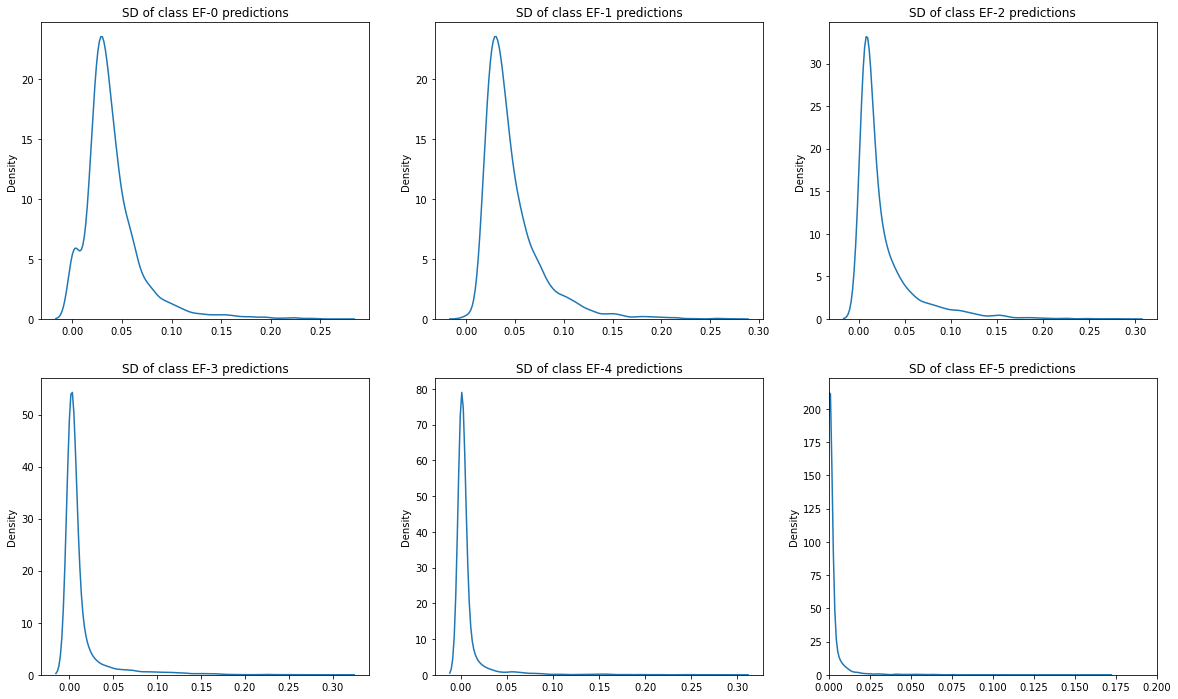

In [207]:
import math

# Create a 3 x 4 subplot grid for our plots
fig, axs = plt.subplots(2, 3, figsize=(20,12))
for idx in range(6):
    
    # Calculate the x,y position for our subplot
    x = math.floor(idx / 3)
    y = idx % 3
    axis = axs[x,y]
    sns.kdeplot(ax=axis, x=hierarchical_trace_4['p'].std(0)[:,idx])
    axis.set_title(f"SD of class EF-{idx} predictions")
    plt.xlim(0,0.2)
fig.show()